### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [31]:
data = pd.read_csv('coupons.csv')

In [32]:
data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [33]:
data.tail(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


2. Investigate the dataset for missing or problematic data.

In [34]:
data.info() #I can see that car, Bar, CoffeeHouse , Carry Away, RestaurantLessThan 20, Restaurant20To50 have some missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [35]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

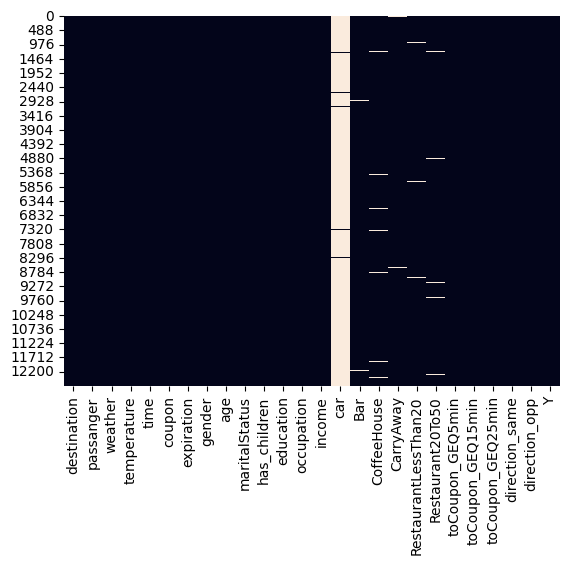

In [36]:
sns.heatmap(data.isnull(), cbar=False) #Heatmap for missing values

In [37]:
data.value_counts("Bar",dropna=False)

,count
Bar,
never,5197
less1,3482
1~3,2473
4~8,1076
gt8,349
NaN,107


In [38]:
data.value_counts("CoffeeHouse",dropna=False)

,count
CoffeeHouse,
less1,3385
1~3,3225
never,2962
4~8,1784
gt8,1111
NaN,217


In [39]:
data.value_counts("CarryAway",dropna=False)

,count
CarryAway,
1~3,4672
4~8,4258
less1,1856
gt8,1594
never,153
NaN,151


In [40]:
data.value_counts("RestaurantLessThan20",dropna=False)

,count
RestaurantLessThan20,
1~3,5376
4~8,3580
less1,2093
gt8,1285
never,220
NaN,130


In [41]:
data.value_counts("Restaurant20To50",dropna=False)

,count
Restaurant20To50,
less1,6077
1~3,3290
never,2136
4~8,728
gt8,264
NaN,189


In [42]:
data.value_counts("coupon",dropna=False)

,count
coupon,
Coffee House,3996
Restaurant(<20),2786
Carry out & Take away,2393
Bar,2017
Restaurant(20-50),1492


In [43]:
data.value_counts("expiration",dropna=False)

,count
expiration,
1d,7091
2h,5593


In [44]:
data["coupon"] = data["coupon"].replace({
    "Coffee House":"CoffeeHouse",
    "Restaurant(<20)":"Restaurant20" ,
    "Carry out & Take away":"CarryOut_TakeAway",
    "Bar": "Bar",
    "Restaurant(20-50)":"Restaurant2050"
})

In [45]:
data.value_counts("coupon",dropna=False)

,count
coupon,
CoffeeHouse,3996
Restaurant20,2786
CarryOut_TakeAway,2393
Bar,2017
Restaurant2050,1492


3. Decide what to do about your missing data -- drop, replace, other...

In [46]:
#Count the number of missing values

missing_counts_Bar = data["Bar"].isnull().sum()
missing_counts_CoffeeHouse = data["CoffeeHouse"].isnull().sum()
missing_counts_CarryAway = data["CarryAway"].isnull().sum()
missing_counts_RestaurantLessThan20 = data["RestaurantLessThan20"].isnull().sum()
missing_counts_Restaurant20To50 = data["Restaurant20To50"].isnull().sum()
missing_counts_car = data["car"].isnull().sum()

print("Total missing values for Bar column:",missing_counts_Bar)
print("Total missing values for CoffeeHouse column:",missing_counts_CoffeeHouse)
print("Total missing values for CarryAway column:",missing_counts_CarryAway)
print("Total missing values for RestaurantLessThan20 column:",missing_counts_RestaurantLessThan20)
print("Total missing values for Restaurant20To50 column:",missing_counts_Restaurant20To50)
print("Total missing values for car column:",missing_counts_car)

Total missing values for Bar column: 107
Total missing values for CoffeeHouse column: 217
Total missing values for CarryAway column: 151
Total missing values for RestaurantLessThan20 column: 130
Total missing values for Restaurant20To50 column: 189
Total missing values for car column: 12576


In [47]:
ratio_missing_values_Bar=missing_counts_Bar/len(data)
ratio_missing_values_CoffeeHouse=missing_counts_CoffeeHouse/len(data)
ratio_missing_values_CarryAway =missing_counts_CarryAway /len(data)
ratio_missing_values_RestaurantLessThan20=missing_counts_RestaurantLessThan20/len(data)
ratio_missing_values_Restaurant20To50=missing_counts_Restaurant20To50/len(data)
ratio_missing_values_car=missing_counts_car/len(data)

print(f"Ratio missing values for Bar column: {ratio_missing_values_Bar:.2%}")
print(f"Ratio missing values for CoffeeHouse column: {ratio_missing_values_CoffeeHouse:.2%}")
print(f"Ratio missing values for CarryAway column: {ratio_missing_values_CarryAway:.2%}")
print(f"Ratio missing values for RestaurantLessThan20 column: {ratio_missing_values_RestaurantLessThan20:.2%}")
print(f"Ratio missing values for Restaurant20To50 column: {ratio_missing_values_Restaurant20To50:.2%}")
print(f"Ratio missing values for car column: {ratio_missing_values_car:.2%}")

Ratio missing values for Bar column: 0.84%
Ratio missing values for CoffeeHouse column: 1.71%
Ratio missing values for CarryAway column: 1.19%
Ratio missing values for RestaurantLessThan20 column: 1.02%
Ratio missing values for Restaurant20To50 column: 1.49%
Ratio missing values for car column: 99.15%


In [ ]:
#I can see that the "car" has most of the values missing, more than 99%, I will replace them with Unkonwn.
#The others columns Bar, CoffeeHouse , CarryAway, RestaurantLessThan 20, Restaurant20To50 have some missing values (always less then 5%), I will drop those rows

In [48]:
print("Original shape:", data.shape)

Original shape: (12684, 26)


In [49]:
data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway',
                     "RestaurantLessThan20", "Restaurant20To50"], inplace=True)

print("After cleaning:", data.shape)

After cleaning: (12079, 26)


In [53]:
data['car'] = data['car'].fillna('Unknown')


4. What proportion of the total observations chose to accept the coupon?



In [54]:
data.value_counts("Y")

,count
Y,
1,6877
0,5202


In [56]:

# Total number of records
Total_records = data.shape[0]

# Number of records where a coupon is accepted
coupon_accepted = data[data.Y == 1].shape[0]

# Percentage of records with coupons accepted
percentage_coupon_accepted =coupon_accepted * 100.0 / Total_records

# Print the results
print ("The total number of records: {}".format(Total_records))
print ("The number of records where a coupon is accepted: {}".format(coupon_accepted))
print ("The percentage of irecords where a coupon is accepted: {:.2f}%".format(percentage_coupon_accepted))

The total number of records: 12079
The number of records where a coupon is accepted: 6877
The percentage of irecords where a coupon is accepted: 56.93%


5. Use a bar plot to visualize the `coupon` column.

/tmp/ipython-input-2744770248.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


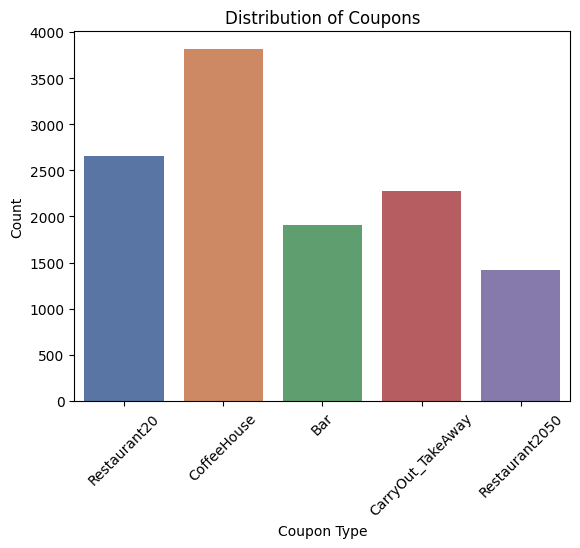

In [61]:

# Create a bar plot for the 'coupon' column
sns.countplot(
    data=data,
    x='coupon' ,
    palette= "deep"
)

plt.title("Distribution of Coupons")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.show()

6. Use a histogram to visualize the temperature column.

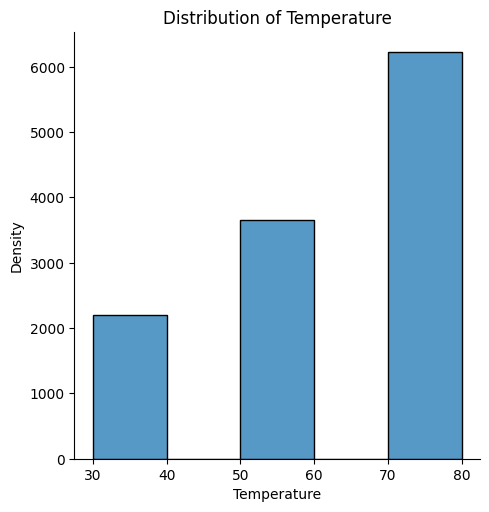

In [73]:
sns.displot(data=data, x="temperature",bins=5)

plt.title("Distribution of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Density")
plt.show()

<Axes: xlabel='temperature', ylabel='Count'>

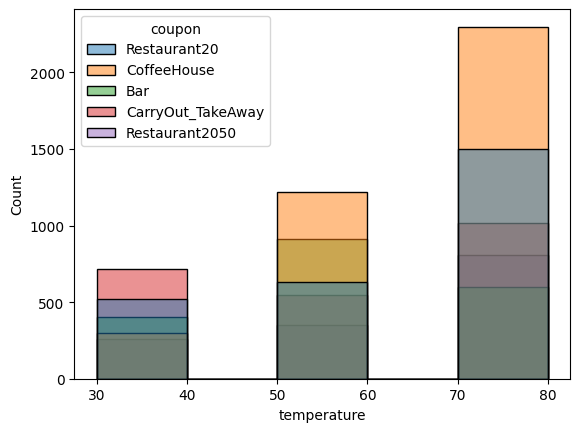

In [74]:
sns.histplot(data=data, x="temperature", hue="coupon", bins=5)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [75]:
bar_coupons = data[data['coupon'] == 'Bar']

In [76]:
bar_coupons.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [77]:
# Total number of records
Total_bar_coupons = bar_coupons.shape[0]

# Number of records where a coupon is accepted
bar_coupons_accepted = bar_coupons[bar_coupons.Y == 1].shape[0]

# Percentage of records with coupons accepted
percentage_bar_coupons_accepted =bar_coupons_accepted * 100.0 / Total_records

# Print the results
print ("The total number of records: {}".format(Total_records))
print ("The number of records where a coupon is accepted: {}".format(coupon_accepted))
print ("The percentage of irecords where a coupon is accepted: {:.2f}%".format(percentage_coupon_accepted))

The total number of records: 1913
The number of records where a coupon is accepted: 788
The percentage of irecords where a coupon is accepted: 41.19%


In [79]:
data.value_counts("Bar")

,count
Bar,
never,4934
less1,3394
1~3,2370
4~8,1054
gt8,327


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [82]:
bar_coupons.loc[:, "Bar"] = bar_coupons["Bar"].replace({
    "never": 0,
    "less1": 0,
    "1~3": 2,# mean of 1 and 3
    "4~8": 6,# mean of 4 and 8
    "gt8": 9
})

In [93]:
#create 2 new data frame for who went to a bar less than 3 and for who went to a bar more than 3
bar_coupons_3orless=bar_coupons[bar_coupons['Bar'] <= 3]
bar_coupons_morethan3=bar_coupons[bar_coupons['Bar'] > 3]

# Total number of records
Total_bar_coupons_3orless = bar_coupons_3orless.shape[0]

# Number of records where a coupon is accepted
bar_coupons_3orless_accepted = bar_coupons_3orless[bar_coupons_3orless.Y == 1].shape[0]

# Percentage of records with coupons accepted
percentage_bar_coupons_3orless_accepted =bar_coupons_3orless_accepted * 100.0 / Total_bar_coupons_3orless

# Print the results
print ("The total number of records coupons for who went to a bar less than 3: {}".format(Total_bar_coupons_3orless))
print ("The number of records where a coupon is accepted for who went to a bar less than 3: {}".format(bar_coupons_3orless_accepted))
print ("The percentage of records where a coupon is accepted for who went to a bar less than 3:: {:.2f}%".format(percentage_bar_coupons_3orless_accepted))

# Total number of records
Total_bar_coupons_morethan3 = bar_coupons_morethan3.shape[0]

# Number of records where a coupon is accepted
bar_coupons_morethan3_accepted = bar_coupons_morethan3[bar_coupons_morethan3.Y == 1].shape[0]

# Percentage of records with coupons accepted
percentage_bar_coupons_morethan3_accepted =bar_coupons_morethan3_accepted * 100.0 / Total_bar_coupons_morethan3

# Print the results
print ("The total number of records coupons for who went to a bar more than 3: {}".format(Total_bar_coupons_morethan3))
print ("The number of records where a coupon is accepted for who went to a bar more than 3: {}".format(bar_coupons_morethan3_accepted))
print ("The percentage of records where a coupon is accepted for who went to a bar more than 3:: {:.2f}%".format(percentage_bar_coupons_morethan3_accepted))


The total number of records coupons for who went to a bar less than 3: 1720
The number of records where a coupon is accepted for who went to a bar less than 3: 641
The percentage of records where a coupon is accepted for who went to a bar less than 3:: 37.27%
The total number of records coupons for who went to a bar more than 3: 193
The number of records where a coupon is accepted for who went to a bar more than 3: 147
The percentage of records where a coupon is accepted for who went to a bar more than 3:: 76.17%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [94]:
bar_coupons.value_counts("age")

,count
age,
21,397
26,368
31,324
50plus,273
36,196
41,171
46,103
below21,81


In [106]:
bar_coupons.loc[:, "age"] = bar_coupons["age"].replace({
    "50plus": 50,
    "below21": 20
}).astype(int)

In [107]:

bar_coupons.loc[:, "Bar"] = bar_coupons["Bar"].replace({
    "never": 0,
    "less1": 0,
    "1~3": 2,# mean of 1 and 3
    "4~8": 6,# mean of 4 and 8
    "gt8": 9
}).astype(int)

/tmp/ipython-input-4259651886.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bar_coupons.loc[:, "Bar"] = bar_coupons["Bar"].replace({


In [111]:
bar_coupons_3more_age25more = bar_coupons[(bar_coupons['Bar'] > 3) & (bar_coupons['age'] > 25)]
bar_coupons_3more_age25less = bar_coupons[(bar_coupons['Bar'] > 3) & (bar_coupons['age'] <= 25)]
# Total number of records
Total_bar_coupons_3more_age25more= bar_coupons_3more_age25more.shape[0]

# Number of records where a coupon is accepted
bar_coupons_3more_age25more_accepted = bar_coupons_3more_age25more[bar_coupons_3more_age25more.Y == 1].shape[0]

# Percentage of records with coupons accepted
percentage_bar_coupons_3more_age25more_accepted =bar_coupons_3more_age25more_accepted * 100.0 / Total_bar_coupons_3more_age25more

# Print the results
print ("The total number of records coupons for who went to a bar less than 3 and older than 25: {}".format(Total_bar_coupons_3more_age25more))
print ("The number of records where a coupon is accepted for who went to a bar less than 3 and older than 25: {}".format(bar_coupons_3more_age25more_accepted))
print ("The percentage of records where a coupon is accepted for who went to a bar less than 3 and older than 25: {:.2f}%".format(percentage_bar_coupons_3more_age25more_accepted))

# Total number of records
Total_bar_coupons_3more_age25less= bar_coupons_3more_age25less.shape[0]

# Number of records where a coupon is accepted
bar_coupons_3more_age25less_accepted = bar_coupons_3more_age25less[bar_coupons_3more_age25less.Y == 1].shape[0]

# Percentage of records with coupons accepted
percentage_bar_coupons_3more_age25less_accepted =bar_coupons_3more_age25less_accepted * 100.0 / Total_bar_coupons_3more_age25less

# Print the results
print ("The total number of records coupons for who went to a bar less than 3 and younger than 25: {}".format(Total_bar_coupons_3more_age25less))
print ("The number of records where a coupon is accepted for who went to a bar less than 3 and younger than 25: {}".format(bar_coupons_3more_age25less_accepted))
print ("The percentage of records where a coupon is accepted for who went to a bar less than 3 and younger than 25: {:.2f}%".format(percentage_bar_coupons_3more_age25less_accepted))


The total number of records coupons for who went to a bar less than 3 and older than 25: 133
The number of records where a coupon is accepted for who went to a bar less than 3 and older than 25: 102
The percentage of records where a coupon is accepted for who went to a bar less than 3 and older than 25: 76.69%
The total number of records coupons for who went to a bar less than 3 and younger than 25: 60
The number of records where a coupon is accepted for who went to a bar less than 3 and younger than 25: 45
The percentage of records where a coupon is accepted for who went to a bar less than 3 and younger than 25: 75.00%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [112]:
bar_coupons.value_counts("passanger")

,count
passanger,
Alone,1141
Friend(s),318
Partner,260
Kid(s),194


In [113]:
bar_coupons.value_counts("occupation")

,count
occupation,
Unemployed,292
Student,237
Computer & Mathematical,225
Sales & Related,175
Education&Training&Library,125
Management,108
Office & Administrative Support,101
Arts Design Entertainment Sports & Media,88
Business & Financial,82


In [ ]:
bar_coupons.loc[:, "Bar"] = bar_coupons["Bar"].replace({
    "never": 0,
    "less1": 0,
    "1~3": 2,# mean of 1 and 3
    "4~8": 6,# mean of 4 and 8
    "gt8": 9
}).astype(int)

In [118]:
bar_coupons_drivers = bar_coupons[(bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'Kid') & (~bar_coupons['occupation'].isin(['Farming', 'Fishing', 'Forestry']))
].copy()


,occupation
90,Student
101,Student
105,Student
112,Student
123,Student
...,...
12500,Office & Administrative Support
12525,Food Preparation & Serving Related
12526,Food Preparation & Serving Related
12529,Food Preparation & Serving Related


In [119]:
# Total number of records
Total_bar_coupons_drivers= bar_coupons_drivers.shape[0]

# Number of records where a coupon is accepted
bar_coupons_drivers_accepted = bar_coupons_drivers[bar_coupons_drivers.Y == 1].shape[0]

# Percentage of records with coupons accepted
percentage_bar_coupons_drivers_accepted =bar_coupons_drivers_accepted * 100.0 / Total_bar_coupons_drivers

# Print the results
print ("The total number of records coupons for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.: {}".format(Total_bar_coupons_drivers))
print ("The number of records where a coupon is accepted for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.: {}".format(bar_coupons_drivers_accepted))
print ("The percentage of records where a coupon is accepted for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.: {:.2f}%".format(percentage_bar_coupons_drivers_accepted))


The total number of records coupons for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.: 572
The number of records where a coupon is accepted for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.: 392
The percentage of records where a coupon is accepted for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.: 68.53%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [129]:
bar_coupons.value_counts("maritalStatus")

,count
maritalStatus,
Married partner,833
Single,638
Unmarried partner,352
Divorced,73
Widowed,17


In [130]:
bar_coupons.value_counts("RestaurantLessThan20")

,count
RestaurantLessThan20,
2,839
6,548
0,340
9,186


In [131]:
bar_coupons.value_counts("income")

,count
income,
$25000 - $37499,300
$100000 or More,282
$12500 - $24999,271
$50000 - $62499,249
$37500 - $49999,247
Less than $12500,159
$75000 - $87499,143
$87500 - $99999,133
$62500 - $74999,129


In [132]:
bar_coupons.loc[:, "RestaurantLessThan20"] = bar_coupons["RestaurantLessThan20"].replace({
    "never": 0,
    "less1": 0,
    "1~3": 2,# mean of 1 and 3
    "4~8": 6,# mean of 4 and 8
    "gt8": 9
}).astype(int)

/tmp/ipython-input-3057107205.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bar_coupons.loc[:, "RestaurantLessThan20"] = bar_coupons["RestaurantLessThan20"].replace({


In [133]:
bar_coupons.loc[:, "income"] = bar_coupons["income"].replace({
    "Less than $12500": 12499,
    "$12500 - $24999": 24999,
    "$25000 - $37499": 37499,
    "$37500 - $49999": 49999,
    "$50000 - $62499": 62499,
    "$62500 - $74999": 74999,
    "$75000 - $87499": 87499,
    "$87500 - $99999": 99999,
    "$100000 or More": 100000
}).astype(int)

/tmp/ipython-input-1527678219.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bar_coupons.loc[:, "income"] = bar_coupons["income"].replace({


In [134]:
#first filtered data frame go to bars more than once a month, had passengers that were not a kid, and were not widowed

bar_coupons_notkid_notwidowed = bar_coupons[(bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'Kid') & (bar_coupons['maritalStatus']!= 'Widowed')
].copy()

In [135]:
# second filtered dataframe go to bars more than once a month and are under the age of 30
bar_coupons_ageless30 = bar_coupons[(bar_coupons['Bar'] > 1) & (bar_coupons['age'] <= 30)].copy()

In [136]:
#third filtered dataframe go to cheap restaurants more than 4 times a month and income is less than 50K
bar_coupons_cheaprestaurantmore4_incomemore50k= bar_coupons[(bar_coupons['RestaurantLessThan20'] > 4) & (bar_coupons['income'] < 50000)].copy()

In [137]:
# Total number of records
Total_bar_coupons_notkid_notwidowed= bar_coupons_notkid_notwidowed.shape[0]
Total_bar_coupons_ageless30 = bar_coupons_ageless30.shape[0]
Total_bar_coupons_cheaprestaurantmore4_incomemore50k= bar_coupons_cheaprestaurantmore4_incomemore50k.shape[0]

# Number of records where a coupon is accepted
bar_coupons_notkid_notwidowed_accepted = bar_coupons_notkid_notwidowed[bar_coupons_notkid_notwidowed.Y == 1].shape[0]
bar_coupons_ageless30_accepted = bar_coupons_ageless30[bar_coupons_ageless30.Y == 1].shape[0]
bar_coupons_cheaprestaurantmore4_incomemore50k_accepted = bar_coupons_cheaprestaurantmore4_incomemore50k[bar_coupons_cheaprestaurantmore4_incomemore50k.Y == 1].shape[0]

# Percentage of records with coupons accepted
percentage_bar_coupons_notkid_notwidowed_accepted =bar_coupons_notkid_notwidowed_accepted * 100.0 / Total_bar_coupons_notkid_notwidowed
percentage_bar_coupons_ageless30_accepted =bar_coupons_ageless30_accepted * 100.0 / Total_bar_coupons_ageless30
percentage_bar_coupons_cheaprestaurantmore4_incomemore50k_accepted =bar_coupons_cheaprestaurantmore4_incomemore50k_accepted * 100.0 / Total_bar_coupons_cheaprestaurantmore4_incomemore50k
# Print the results
print ("The total number of records coupons for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed .: {}".format(Total_bar_coupons_notkid_notwidowed))
print ("The number of records where a coupon is accepted for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {}".format(bar_coupons_notkid_notwidowed_accepted))
print ("The percentage of records where a coupon is accepted for drivers whogo to bars more than once a month, had passengers that were not a kid, and were not widowed.: {:.2f}%".format(percentage_bar_coupons_notkid_notwidowed_accepted))
print ("The total number of records coupons for drivers who go to bars more than once a month and are under the age of 30.: {}".format(Total_bar_coupons_ageless30))
print ("The number of records where a coupon is accepted for drivers who go to bars more than once a month and are under the age of 30: {}".format(bar_coupons_ageless30_accepted))
print ("The percentage of records where a coupon is accepted for drivers who go to bars more than once a month and are under the age of 30.: {:.2f}%".format(percentage_bar_coupons_ageless30_accepted))
print ("The total number of records coupons for drivers who third filtered dataframe go to cheap restaurants more than 4 times a month and income is less than 50K .: {}".format(Total_bar_coupons_cheaprestaurantmore4_incomemore50k))
print ("The number of records where a coupon is accepted for drivers who third filtered dataframe go to cheap restaurants more than 4 times a month and income is less than 50K: {}".format(bar_coupons_cheaprestaurantmore4_incomemore50k_accepted))
print ("The percentage of records where a coupon is accepted for drivers who third filtered dataframe go to cheap restaurants more than 4 times a month and income is less than 50K.: {:.2f}%".format(percentage_bar_coupons_cheaprestaurantmore4_incomemore50k_accepted))



The total number of records coupons for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed .: 572
The number of records where a coupon is accepted for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 392
The percentage of records where a coupon is accepted for drivers whogo to bars more than once a month, had passengers that were not a kid, and were not widowed.: 68.53%
The total number of records coupons for drivers who go to bars more than once a month and are under the age of 30.: 328
The number of records where a coupon is accepted for drivers who go to bars more than once a month and are under the age of 30: 236
The percentage of records where a coupon is accepted for drivers who go to bars more than once a month and are under the age of 30.: 71.95%
The total number of records coupons for drivers who third filtered dataframe go to cheap restaurants more than 4 times a month

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [149]:
#Based on these observation we can hypothesize that the drivers who accepte the bar coupons are young (less then 30 years old) and they went to a bar more then once per month.
#Furthermore t

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [151]:
data.loc[:, "Restaurant20To50"] = data["Restaurant20To50"].replace({
    "never": 0,
    "less1": 0,
    "1~3": 2,# mean of 1 and 3
    "4~8": 6,# mean of 4 and 8
    "gt8": 9
}).astype(int)

data.loc[:, "age"] = data["age"].replace({
    "50plus": 50,
    "below21": 20
}).astype(int)


/tmp/ipython-input-3186701634.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.loc[:, "Restaurant20To50"] = data["Restaurant20To50"].replace({


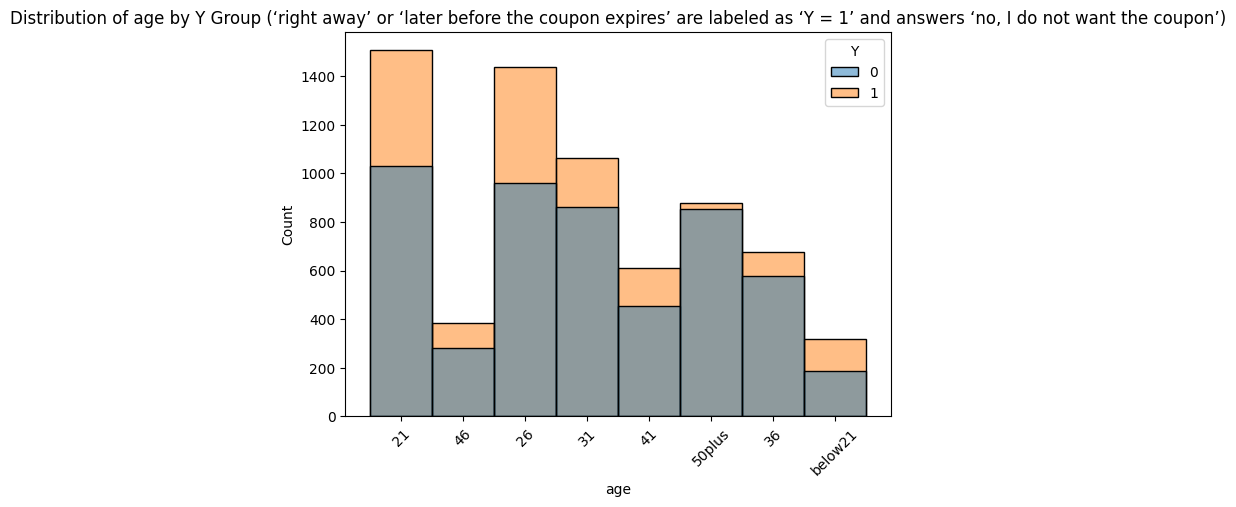

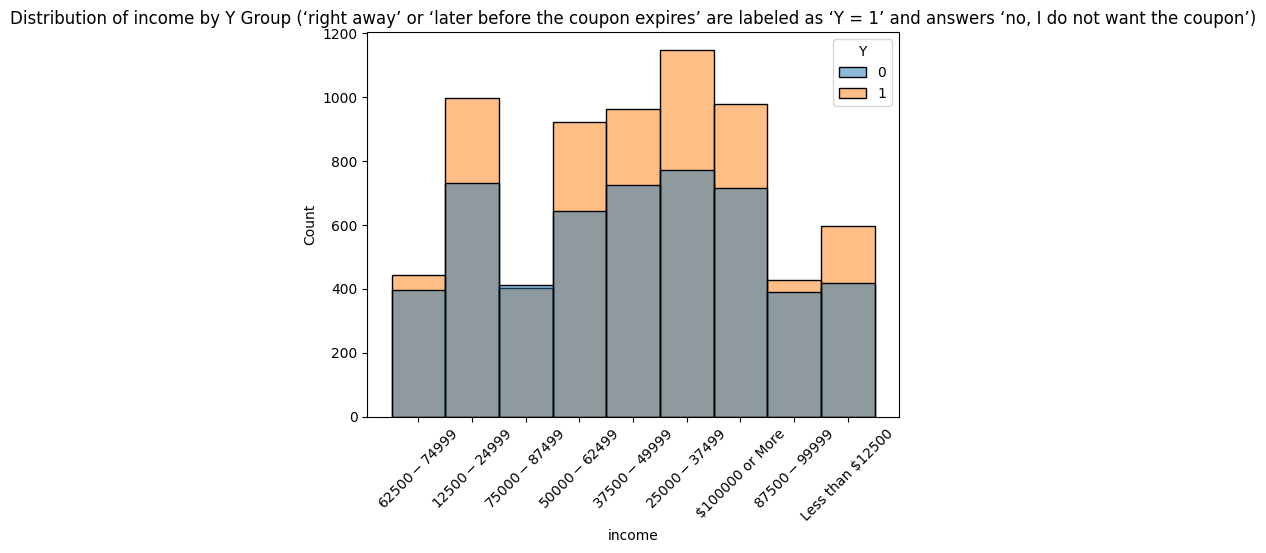

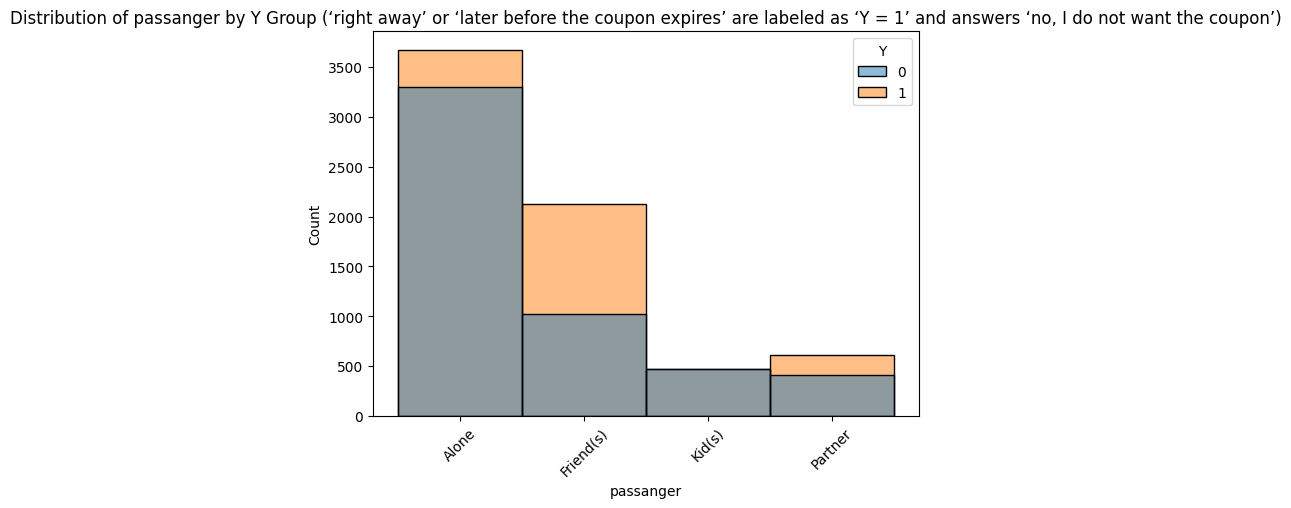

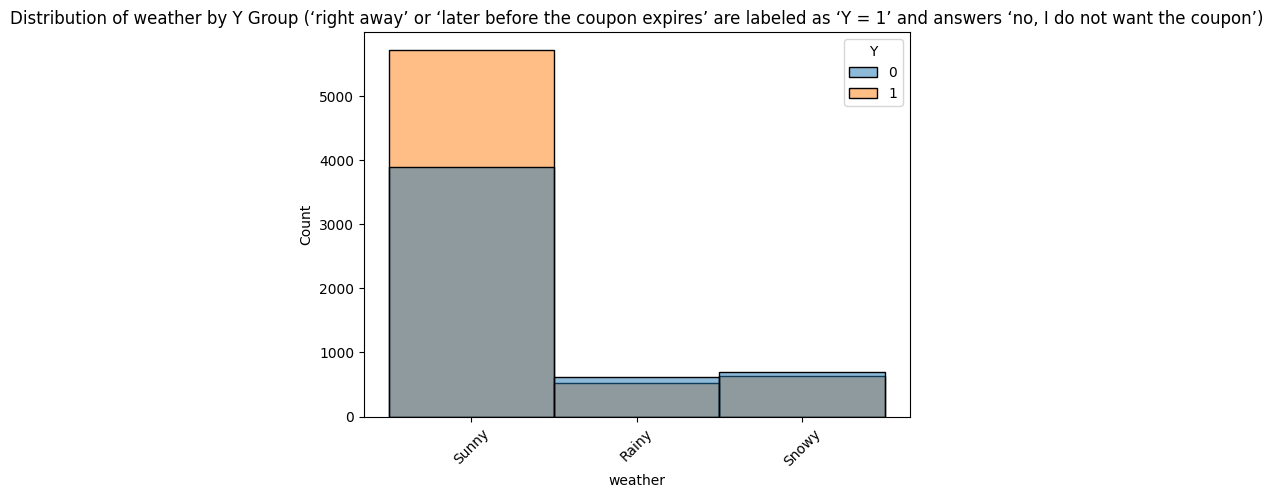

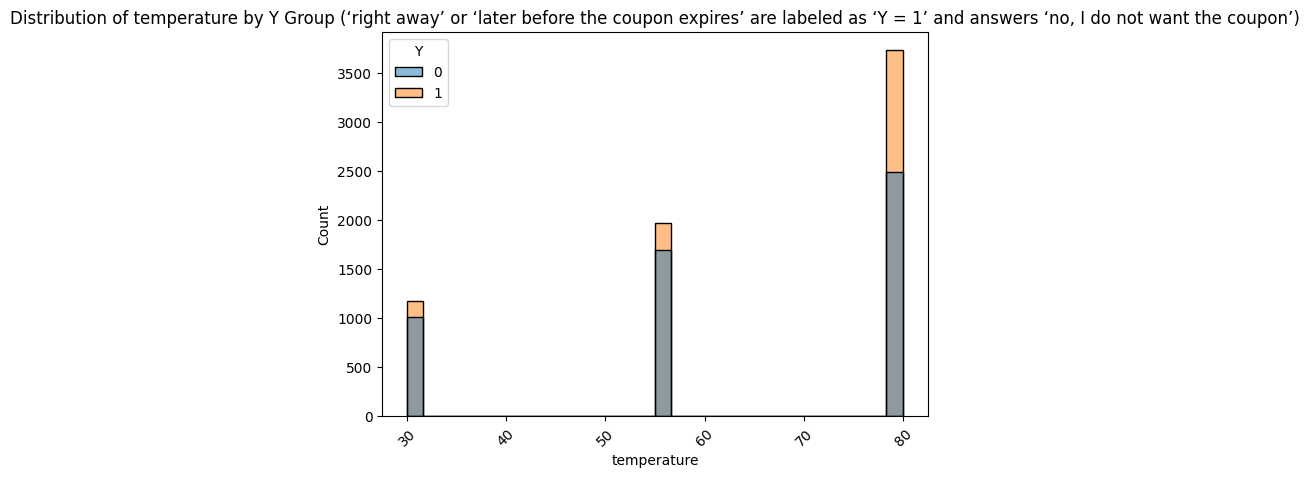

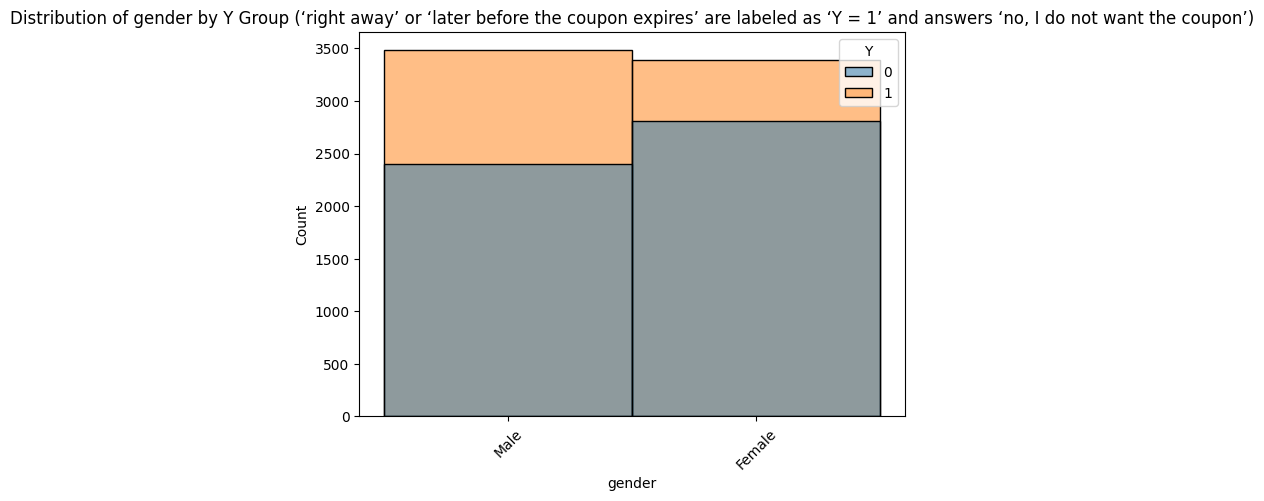

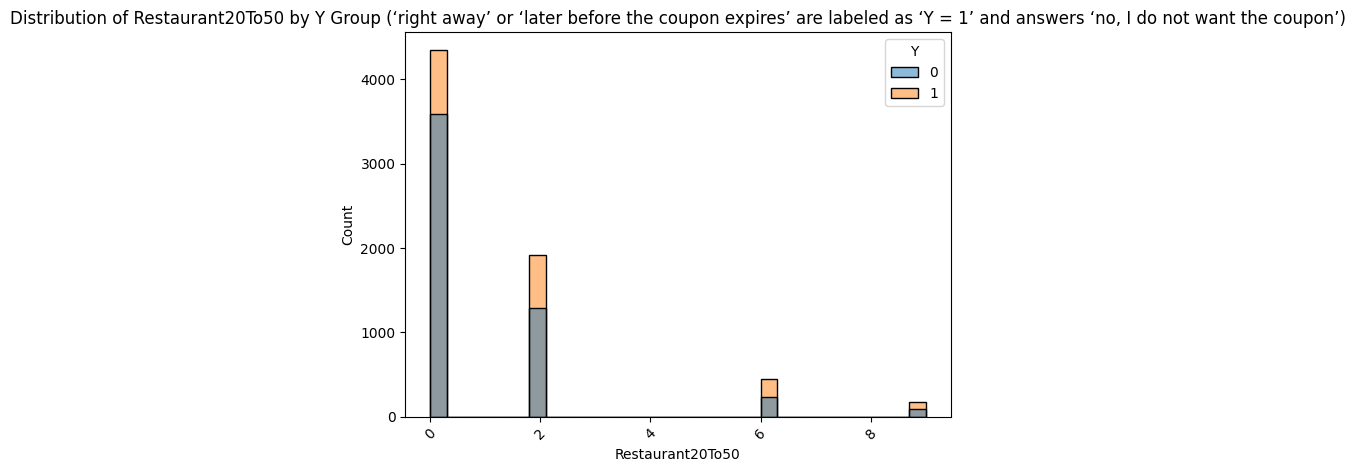

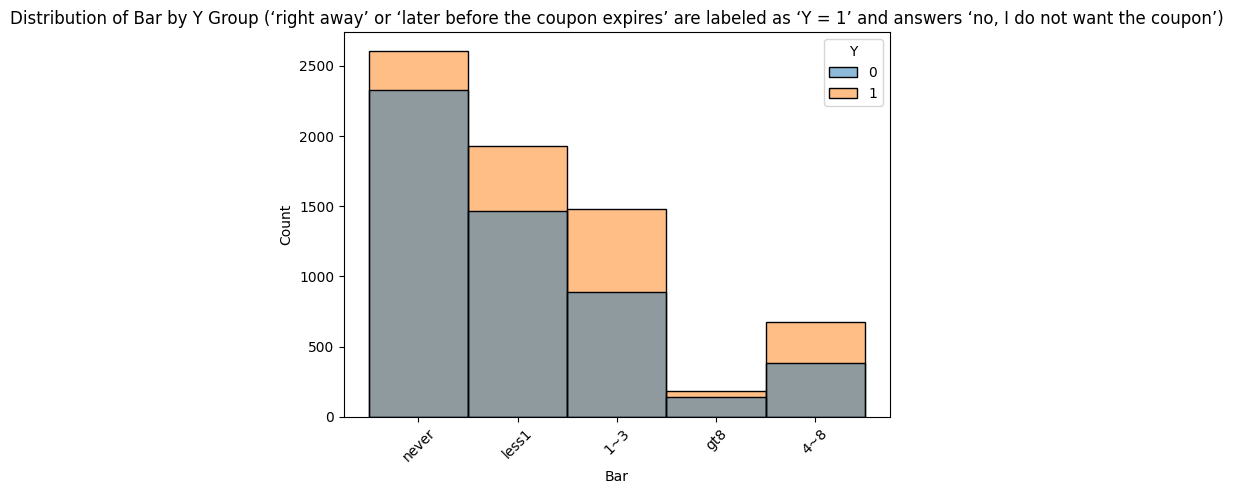

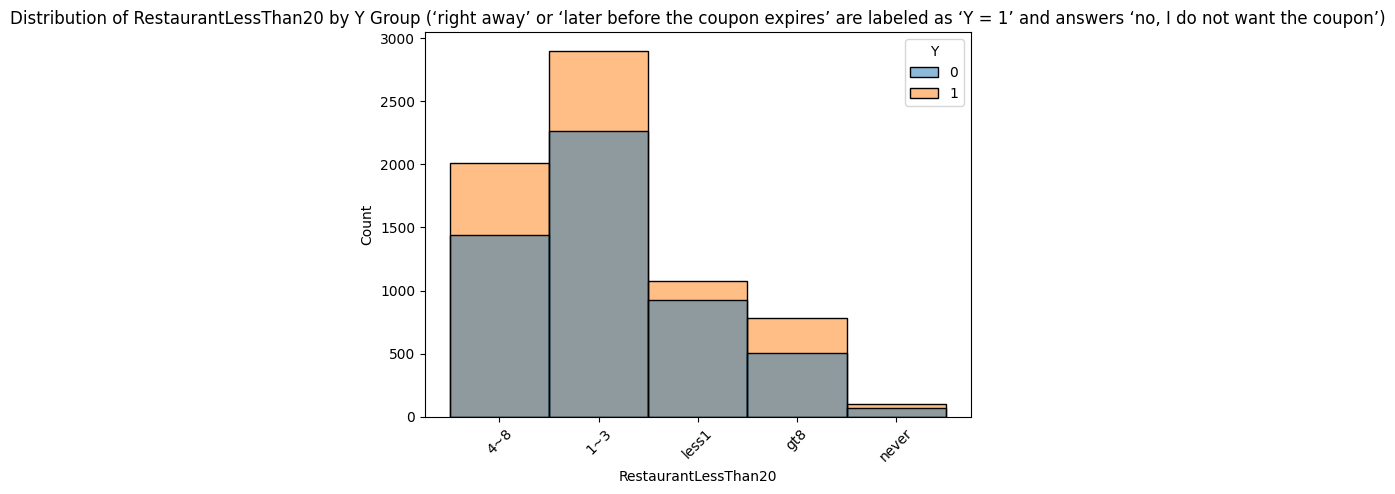

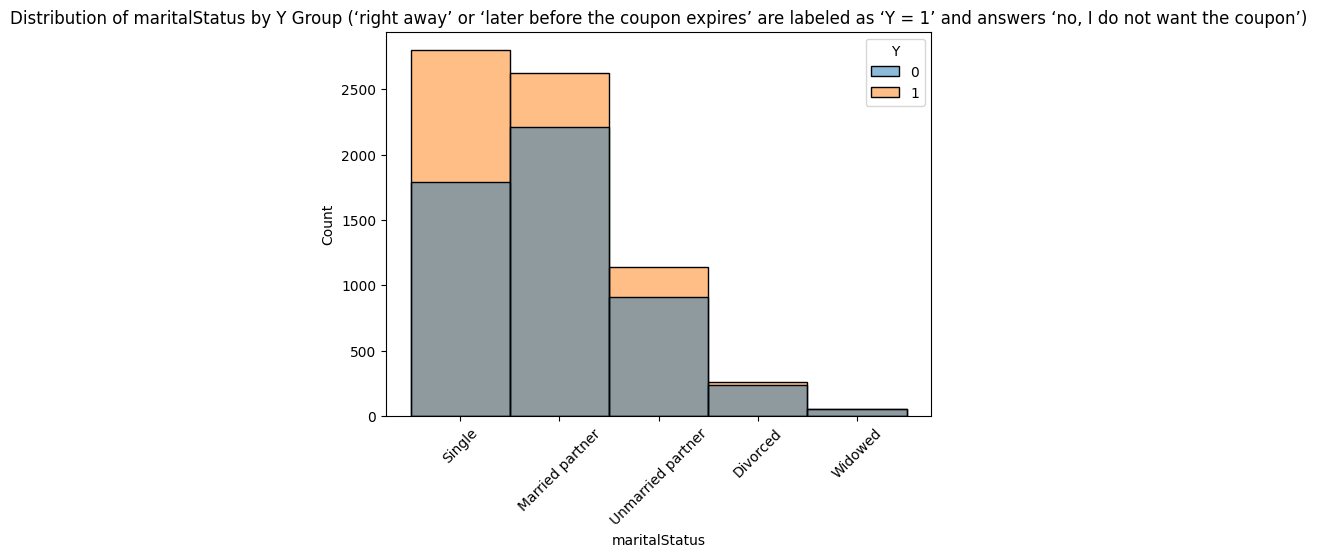

In [148]:
numeric_cols = ["age", "income", "passanger","weather","temperature","gender","Restaurant20To50","Bar","RestaurantLessThan20","maritalStatus"]

for col in numeric_cols:
    fig, ax = plt.subplots()
    sns.histplot(data=data, x=col, hue="Y", bins=30, kde=False, ax=ax)
    ax.set_title(f"Distribution of {col} by Y Group (‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’)")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

In [154]:
#I compare the acceptance rate of coupons for younger drivers (less than 30 years old)
coupons_ageless30 = data[data['age'] <= 30].copy()
coupons_agemore30 = data[data['age'] > 30].copy()

In [157]:

# Total number of records
Total_coupons_ageless30= coupons_ageless30.shape[0]

# Number of records where a coupon is accepted
coupons_ageless30_accepted = coupons_ageless30[coupons_ageless30.Y == 1].shape[0]

# Percentage of records with coupons accepted
percentage_coupons_ageless30_accepted =coupons_ageless30_accepted * 100.0 / Total_coupons_ageless30

# Print the results
print ("The total number of records coupons for who is younger than 30: {}".format(Total_coupons_ageless30))
print ("The number of records where a coupon is accepted for who is younger than 30: {}".format(coupons_ageless30_accepted))
print ("The percentage of records where a coupon is accepted for who is younger than 30: {:.2f}%".format(percentage_coupons_ageless30_accepted))

# Total number of records
Total_coupons_agemore30= coupons_agemore30.shape[0]

# Number of records where a coupon is accepted
coupons_agemore30_accepted = coupons_agemore30[coupons_agemore30.Y == 1].shape[0]

# Percentage of records with coupons accepted
percentage_coupons_agemore30_accepted =coupons_agemore30_accepted * 100.0 / Total_coupons_agemore30

# Print the results
print ("The total number of records coupons for who is older than 30: {}".format(Total_coupons_agemore30))
print ("The number of records where a coupon is accepted for who is older than 30: {}".format(coupons_agemore30_accepted))
print ("The percentage of records where a coupon is accepted for who is older than 30: {:.2f}%".format(percentage_coupons_agemore30_accepted))

The total number of records coupons for who is younger than 30: 5440
The number of records where a coupon is accepted for who is younger than 30: 3265
The percentage of records where a coupon is accepted for who is younger than 30: 60.02%
The total number of records coupons for who is older than 30: 6639
The number of records where a coupon is accepted for who is older than 30: 3612
The percentage of records where a coupon is accepted for who is older than 30: 54.41%


In [160]:
#I compare the acceptance rate of coupons for male drivers
coupons_male = data[data['gender'] =="Male"].copy()
coupons_female = data[data['gender'] =="Female"].copy()

In [162]:
# Total number of records
Total_coupons_male= coupons_male.shape[0]

# Number of records where a coupon is accepted
coupons_male_accepted = coupons_male[coupons_male.Y == 1].shape[0]

# Percentage of records with coupons accepted
percentage_coupons_male_accepted =coupons_male_accepted * 100.0 / Total_coupons_male

# Print the results
print ("The total number of records coupons for who is a male: {}".format(Total_coupons_male))
print ("The number of records where a coupon is accepted for who is a male: {}".format(coupons_male_accepted))
print ("The percentage of records where a coupon is accepted for who is a male: {:.2f}%".format(percentage_coupons_male_accepted))

# Total number of records
Total_coupons_female= coupons_female.shape[0]

# Number of records where a coupon is accepted
coupons_female_accepted = coupons_female[coupons_female.Y == 1].shape[0]

# Percentage of records with coupons accepted
percentage_coupons_female_accepted =coupons_female_accepted * 100.0 / Total_coupons_female

# Print the results
print ("The total number of records coupons for who is a male: {}".format(Total_coupons_female))
print ("The number of records where a coupon is accepted for who is a male: {}".format(coupons_female_accepted))
print ("The percentage of records where a coupon is accepted for who is a male: {:.2f}%".format(percentage_coupons_female_accepted))

The total number of records coupons for who is a male: 5880
The number of records where a coupon is accepted for who is a male: 3483
The percentage of records where a coupon is accepted for who is a male: 59.23%
The total number of records coupons for who is a male: 6199
The number of records where a coupon is accepted for who is a male: 3394
The percentage of records where a coupon is accepted for who is a male: 54.75%


In [169]:
#I compare the acceptance rate of coupons for single drivers
coupons_single = data[data['maritalStatus'] =="Single"].copy()
coupons_notsingle = data[data['maritalStatus'] !="Single"].copy()

In [171]:
# Total number of records
Total_coupons_single= coupons_single.shape[0]

# Number of records where a coupon is accepted
coupons_single_accepted = coupons_single[coupons_single.Y == 1].shape[0]

# Percentage of records with coupons accepted
percentage_coupons_single_accepted =coupons_single_accepted * 100.0 / Total_coupons_single

# Print the results
print ("The total number of records coupons for who is a single: {}".format(Total_coupons_single))
print ("The number of records where a coupon is accepted for who is a single: {}".format(coupons_single_accepted))
print ("The percentage of records where a coupon is accepted for who is a single: {:.2f}%".format(percentage_coupons_single_accepted))

# Total number of records
Total_coupons_notsingle= coupons_notsingle.shape[0]

# Number of records where a coupon is accepted
coupons_notsingle_accepted = coupons_notsingle[coupons_notsingle.Y == 1].shape[0]

# Percentage of records with coupons accepted
percentage_coupons_notsingle_accepted =coupons_notsingle_accepted * 100.0 / Total_coupons_notsingle

# Print the results
print ("The total number of records coupons for who is not a single: {}".format(Total_coupons_notsingle))
print ("The number of records where a coupon is accepted for who is not a single: {}".format(coupons_notsingle_accepted))
print ("The percentage of records where a coupon is accepted for who is not a single: {:.2f}%".format(percentage_coupons_notsingle_accepted))

The total number of records coupons for who is a single: 4588
The number of records where a coupon is accepted for who is a single: 2800
The percentage of records where a coupon is accepted for who is a single: 61.03%
The total number of records coupons for who is not a single: 7491
The number of records where a coupon is accepted for who is not a single: 4077
The percentage of records where a coupon is accepted for who is not a single: 54.43%


In [176]:
#I compare the acceptance rate of coupons for drivers with friends
coupons_friend = data[data['passanger'] =="Friend(s)"].copy()
coupons_notfriend = data[data['passanger'] !="Friend(s)"].copy()

In [177]:
# Total number of records
Total_coupons_friend= coupons_friend.shape[0]

# Number of records where a coupon is accepted
coupons_friend_accepted = coupons_friend[coupons_friend.Y == 1].shape[0]

# Percentage of records with coupons accepted
percentage_coupons_friend_accepted =coupons_friend_accepted * 100.0 / Total_coupons_friend

# Print the results
print ("The total number of records coupons for who is driving with friends: {}".format(Total_coupons_friend))
print ("The number of records where a coupon is accepted for who is driving with friends: {}".format(coupons_friend_accepted))
print ("The percentage of records where a coupon is accepted for who is driving with friends: {:.2f}%".format(percentage_coupons_friend_accepted))

# Total number of records
Total_coupons_notfriend= coupons_notfriend.shape[0]

# Number of records where a coupon is accepted
coupons_notfriend_accepted = coupons_notfriend[coupons_notfriend.Y == 1].shape[0]

# Percentage of records with coupons accepted
percentage_coupons_notfriend_accepted =coupons_notfriend_accepted * 100.0 / Total_coupons_notfriend

# Print the results
print ("The total number of records coupons for who is notdriving with friends: {}".format(Total_coupons_notfriend))
print ("The number of records where a coupon is accepted for who is not driving with friends: {}".format(coupons_notfriend_accepted))
print ("The percentage of records where a coupon is accepted for who is driving with friends: {:.2f}%".format(percentage_coupons_notfriend_accepted))

The total number of records coupons for who is driving with friends: 3148
The number of records where a coupon is accepted for who is driving with friends: 2129
The percentage of records where a coupon is accepted for who is driving with friends: 67.63%
The total number of records coupons for who is notdriving with friends: 8931
The number of records where a coupon is accepted for who is not driving with friends: 4748
The percentage of records where a coupon is accepted for who is driving with friends: 53.16%


In [ ]:
#from the above graphics and the acceptance ratio we can see that:
# 1 - younger drivers are more open to accept the coupons.
# 2 - male drivers are more open to accept the coupons
# 3 - single drivers are more open to accept the coupons
# 4 - drivers with friends are more open to accept the coupons